<a href="https://colab.research.google.com/github/alra-code/Desafio-Alura-TelecomX_BR/blob/main/TelecomX_BR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#📌 Extracão

In [72]:
#importação da biblioteca pandas
import pandas as pd

In [73]:
#criando a variavel url
url = 'https://raw.githubusercontent.com/alura-cursos/challenge2-data-science/refs/heads/main/TelecomX_Data.json'

In [74]:
#baixando o dataframe
df = pd.read_json(url)

In [75]:
#visualizando das 5 primeiras linhas
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [76]:
#Conhecendo o df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [77]:
#conferindo o número de linhas e de colunas
df.shape

(7267, 6)

In [78]:
#normalizar as colunas que precisam
df_customer = pd.json_normalize(df['customer'])
df_phone = pd.json_normalize(df['phone'])
df_internet = pd.json_normalize(df['internet'])
df_account = pd.json_normalize(df['account'])

In [79]:
#transformando as colunas não normalizadas em df_cc
df_cc = df[['customerID', 'Churn']]

In [80]:
#Concatenando todas as colunas
df_final = pd.concat([df_cc, df_customer, df_phone, df_internet, df_account], axis=1)

In [81]:
#Visualizando como a df_final
df_final.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [82]:
#Visualizando a base
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [83]:
#Traduzindo as colunas de inglês para português para facilitar
df_final.rename(columns={
    'customerID': 'ID_Cliente',
    'Churn': 'Cancelou',
    'gender': 'Genero',
    'SeniorCitizen': 'Idoso',
    'Partner': 'Tem_Parceiro',
    'Dependents': 'Tem_Dependentes',
    'tenure': 'Meses_Com_Empresa',
    'PhoneService': 'Telefone_Fixo',
    'MultipleLines': 'Multiplas_Linhas',
    'InternetService': 'Tipo_Internet',
    'OnlineSecurity': 'Seguranca_Online',
    'OnlineBackup': 'Backup_Online',
    'DeviceProtection': 'Protecao_Dispositivo',
    'TechSupport': 'Suporte_Tecnico',
    'StreamingTV': 'Streaming_TV',
    'StreamingMovies': 'Streaming_Filmes',
    'Contract': 'Tipo_Contrato',
    'PaperlessBilling': 'Fatura_Digital',
    'PaymentMethod': 'Metodo_Pagamento',
    'Charges.Monthly': 'Cobranca_Mensal',
    'Charges.Total': 'Cobranca_Total'
}, inplace=True)

In [84]:
#Conferindo
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID_Cliente            7267 non-null   object 
 1   Cancelou              7267 non-null   object 
 2   Genero                7267 non-null   object 
 3   Idoso                 7267 non-null   int64  
 4   Tem_Parceiro          7267 non-null   object 
 5   Tem_Dependentes       7267 non-null   object 
 6   Meses_Com_Empresa     7267 non-null   int64  
 7   Telefone_Fixo         7267 non-null   object 
 8   Multiplas_Linhas      7267 non-null   object 
 9   Tipo_Internet         7267 non-null   object 
 10  Seguranca_Online      7267 non-null   object 
 11  Backup_Online         7267 non-null   object 
 12  Protecao_Dispositivo  7267 non-null   object 
 13  Suporte_Tecnico       7267 non-null   object 
 14  Streaming_TV          7267 non-null   object 
 15  Streaming_Filmes     

In [85]:
df_final.head()

,ID_Cliente,Cancelou,Genero,Idoso,Tem_Parceiro,Tem_Dependentes,Meses_Com_Empresa,Telefone_Fixo,Multiplas_Linhas,Tipo_Internet,...,Backup_Online,Protecao_Dispositivo,Suporte_Tecnico,Streaming_TV,Streaming_Filmes,Tipo_Contrato,Fatura_Digital,Metodo_Pagamento,Cobranca_Mensal,Cobranca_Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [86]:
#Salvando em csv para facilitar na transformação
df_final.to_csv('TelecomX_Dados_Tratados.csv', index=False)

#🔧 Transformação

In [87]:
# Mudando a coluna Tem parceiro, Tem dependente e Fatura digital para boleano
colunas_booleanas = [

    'Tem_Parceiro',
    'Tem_Dependentes',
    'Fatura_Digital'
]

In [88]:
#aplicando a conversão ao data frame final
df_final[colunas_booleanas] = df_final[colunas_booleanas].replace({'Yes': True, 'No': False})

/tmp/ipython-input-88-2214237703.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_final[colunas_booleanas] = df_final[colunas_booleanas].replace({'Yes': True, 'No': False})


In [89]:
#Conferindo
df_final[colunas_booleanas].dtypes

,0
Tem_Parceiro,bool
Tem_Dependentes,bool
Fatura_Digital,bool


In [90]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID_Cliente            7267 non-null   object 
 1   Cancelou              7267 non-null   object 
 2   Genero                7267 non-null   object 
 3   Idoso                 7267 non-null   int64  
 4   Tem_Parceiro          7267 non-null   bool   
 5   Tem_Dependentes       7267 non-null   bool   
 6   Meses_Com_Empresa     7267 non-null   int64  
 7   Telefone_Fixo         7267 non-null   object 
 8   Multiplas_Linhas      7267 non-null   object 
 9   Tipo_Internet         7267 non-null   object 
 10  Seguranca_Online      7267 non-null   object 
 11  Backup_Online         7267 non-null   object 
 12  Protecao_Dispositivo  7267 non-null   object 
 13  Suporte_Tecnico       7267 non-null   object 
 14  Streaming_TV          7267 non-null   object 
 15  Streaming_Filmes     

In [91]:
#Verificando a coluna Cancelou
linhas_em_branco = df_final[df_final['Cancelou'] == ''].shape[0]

print(f"Número de linhas com 'Cancelou' em branco: {linhas_em_branco}")

linhas_nan = df_final['Cancelou'].isna().sum()
print(f"Número de linhas com 'Cancelou' como NaN: {linhas_nan}")

Número de linhas com 'Cancelou' em branco: 224
Número de linhas com 'Cancelou' como NaN: 0


Temos 224 clientes com a coluna cancelou em branco, esse valor representa aproximadamente 3,08 % da base de dados. Esse percentual pode comprometer a analise.

In [92]:
# Cobrança Total = 0 ou muito baixa
# Pode indicar que o cliente acabou de entrar e ainda não foi faturado (não deu tempo para cancelar).
# ou é um erro na base.
df_final[df_final['Cancelou'] == '']['Cobranca_Total'].value_counts()

,count
Cobranca_Total,
19.55,2
1355.1,1
929.3,1
287.85,1
6792.45,1
...,...
773.2,1
2070.75,1
684.85,1


In [93]:
# Coluna Meses_Com_Empresa
#Essa é uma das colunas mais úteis aqui! Se tenure = 0, o cliente acabou de entrar. Se tenure > 0, ele está na base há algum tempo.
df_final[df_final['Cancelou'] == '']['Meses_Com_Empresa'].describe()


,Meses_Com_Empresa
count,224.000000
mean,31.571429
std,24.998552
min,1.000000
25%,7.000000
50%,29.000000
75%,56.000000
max,72.000000


In [94]:
# Cópia da coluna original
df_final['Status_Inferido'] = df_final['Cancelou']

# Inferência dos clientes com Cancelou em branco
cond_ativo = (df_final['Cancelou'] == '') & \
             (df_final['Meses_Com_Empresa'] > 0) & \
             (df_final['Cobranca_Mensal'] > 0)

df_final.loc[cond_ativo, 'Status_Inferido'] = 'No'

# Se não atender aos critérios, marcar como 'Desconhecido'
cond_desconhecido = (df_final['Cancelou'] == '') & ~cond_ativo
df_final.loc[cond_desconhecido, 'Status_Inferido'] = 'Desconhecido'

In [95]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID_Cliente            7267 non-null   object 
 1   Cancelou              7267 non-null   object 
 2   Genero                7267 non-null   object 
 3   Idoso                 7267 non-null   int64  
 4   Tem_Parceiro          7267 non-null   bool   
 5   Tem_Dependentes       7267 non-null   bool   
 6   Meses_Com_Empresa     7267 non-null   int64  
 7   Telefone_Fixo         7267 non-null   object 
 8   Multiplas_Linhas      7267 non-null   object 
 9   Tipo_Internet         7267 non-null   object 
 10  Seguranca_Online      7267 non-null   object 
 11  Backup_Online         7267 non-null   object 
 12  Protecao_Dispositivo  7267 non-null   object 
 13  Suporte_Tecnico       7267 non-null   object 
 14  Streaming_TV          7267 non-null   object 
 15  Streaming_Filmes     

In [96]:
#conferindo quantos dados foram preenchidos
df_final['Status_Inferido'].notna().sum()

np.int64(7267)

In [97]:
#conferindo quantos nulos temos
df_final['Status_Inferido'].isna().sum()

np.int64(0)

In [98]:
#conferindo novamente a coluna cancelou Para contar apenas os valores nulos (NaN):
df_final['Cancelou'].isna().sum()

np.int64(0)

In [99]:
#conferindo na base toda de há valores nulos ou brancos
df_final.isna().sum().sum()

np.int64(0)

#📊 Carga e análise

In [100]:
#importando a biblioteca matplotilib
import matplotlib.pyplot as plt

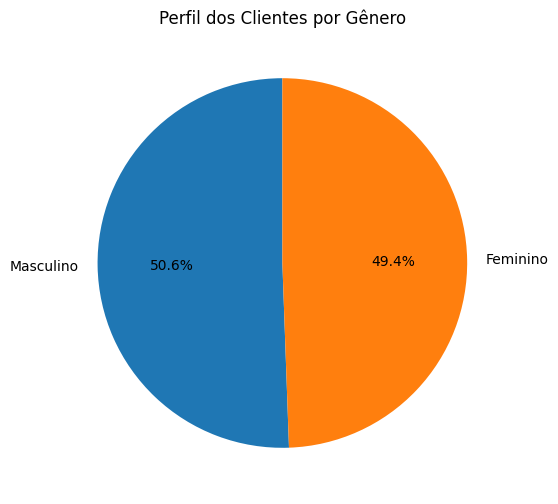

In [101]:
#Avaliando o perfil dos clientes por gênero
# Traduzindo os valores da coluna
df_final['Genero'] = df_final['Genero'].map({'Male': 'Masculino', 'Female': 'Feminino'})

# Gerando o gráfico de pizza
contagem_genero = df_final['Genero'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(contagem_genero, labels=contagem_genero.index, autopct='%1.1f%%', startangle=90)
plt.title('Perfil dos Clientes por Gênero')
plt.show()

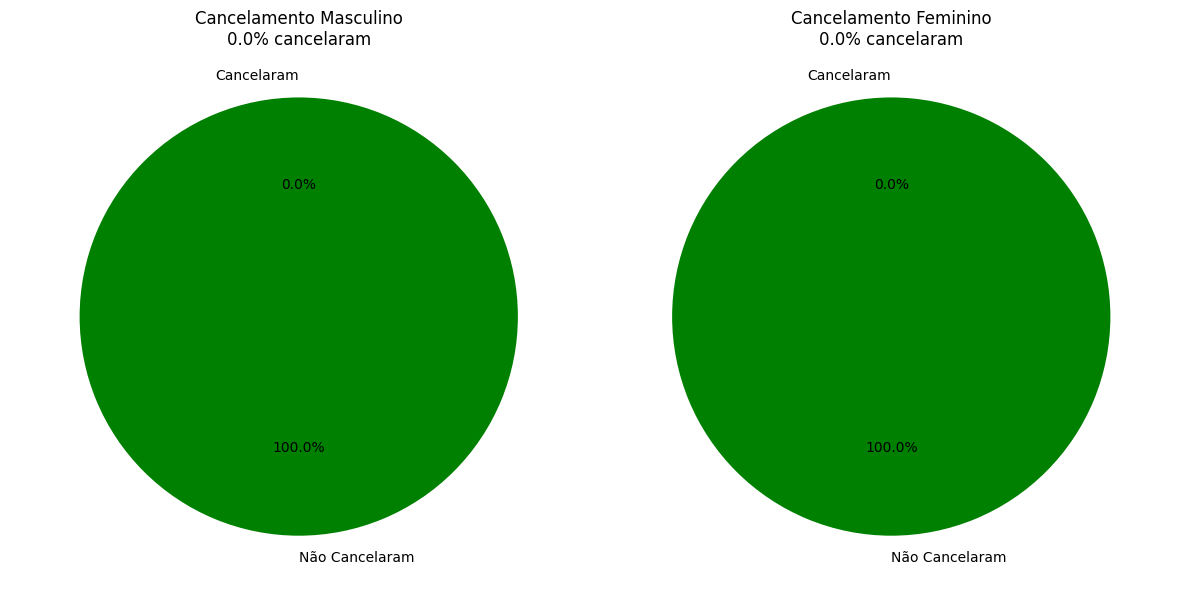

In [102]:
#analisando qual genero cancela com mais frequencia
# Separando por gênero
masculinos = df_final[df_final['Genero'] == 'Masculino']
femininos = df_final[df_final['Genero'] == 'Feminino']

# Total de clientes por gênero
total_masc = len(masculinos)
total_fem = len(femininos)

# Número de cancelamentos (True) por gênero
cancel_masc = masculinos['Cancelou'] == True
cancel_fem = femininos['Cancelou'] == True

num_cancel_masc = cancel_masc.sum()
num_cancel_fem = cancel_fem.sum()

# Calculando percentual de cancelamento
perc_cancel_masc = (num_cancel_masc / total_masc) * 100
perc_cancel_fem = (num_cancel_fem / total_fem) * 100

# Dados para gráfico de pizza: cancelou vs não cancelou
dados_masc = [num_cancel_masc, total_masc - num_cancel_masc]
dados_fem = [num_cancel_fem, total_fem - num_cancel_fem]
labels = ['Cancelaram', 'Não Cancelaram']

# Criando os gráficos lado a lado
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Masculino
axs[0].pie(dados_masc, labels=labels, autopct='%1.1f%%', startangle=90, colors=['red', 'green'])
axs[0].set_title(f'Cancelamento Masculino\n{perc_cancel_masc:.1f}% cancelaram')
axs[0].axis('equal')

# Feminino
axs[1].pie(dados_fem, labels=labels, autopct='%1.1f%%', startangle=90, colors=['red', 'green'])
axs[1].set_title(f'Cancelamento Feminino\n{perc_cancel_fem:.1f}% cancelaram')
axs[1].axis('equal')

plt.tight_layout()
plt.show()

#📄Relatorio Final

📌 Gênero
Mulheres representam 49,4% e homens 50,6%
e na base não há cancelamento para, não tendo como analisar o porque os clientes cancelam.